In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils #comment
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [3]:
print('train data = ', len(x_test_image), len(y_test_label))

train data =  10000 10000


In [4]:
print('x_train_image',x_train_image.shape,x_test_image.shape)

x_train_image (60000, 28, 28) (10000, 28, 28)


In [5]:
print('y_train_label',y_train_label.shape,y_test_label.shape)

y_train_label (60000,) (10000,)


In [6]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test  =  x_test_image.reshape(10000,784).astype('float32')

In [7]:
x_Train_normalize = x_Train / 255.0
x_Test_normalize = x_Test / 255.0

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
model = Sequential()

In [11]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
train_history = model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 32s - loss: 0.0353 - accuracy: 0.9882 - val_loss: 0.0862 - val_accuracy: 0.9805
Epoch 2/10
 - 31s - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0788 - val_accuracy: 0.9820
Epoch 3/10
 - 33s - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0793 - val_accuracy: 0.9818
Epoch 4/10
 - 29s - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0779 - val_accuracy: 0.9822
Epoch 5/10
 - 29s - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0867 - val_accuracy: 0.9808
Epoch 6/10
 - 29s - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0788 - val_accuracy: 0.9822
Epoch 7/10
 - 29s - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0755 - val_accuracy: 0.9829
Epoch 8/10
 - 29s - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0784 - val_accuracy: 0.9822
Epoch 9/10
 - 30s - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0859 - val_accuracy: 0.9818
Epoch 10/10
 - 29s - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0833 - val_accuracy: 0.9830


In [36]:
from keras.models import load_model

model.save("model_from_web.h5")

In [37]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

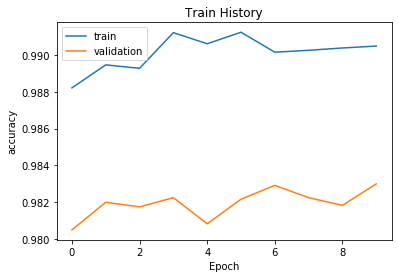

In [38]:
show_train_history(train_history,'accuracy','val_accuracy')

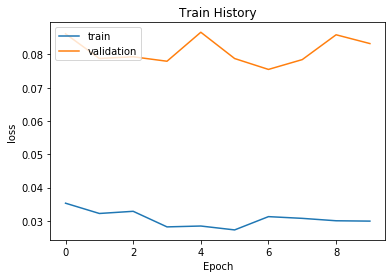

In [39]:
show_train_history(train_history,'loss','val_loss')

In [40]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 3s 302us/step

accuracy =  0.9842000007629395


In [41]:
prediction = model.predict_classes(x_Test)

In [42]:
prediction[340:350]

array([3, 6, 1, 3, 8, 1, 0, 5, 1, 3], dtype=int64)

In [43]:
y_test_label[340:350]

array([5, 6, 1, 3, 8, 1, 0, 5, 1, 3], dtype=uint8)

In [44]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,1,0,1,2,1,0,1
1,0,1129,3,1,0,0,2,0,0,0
2,0,0,1027,0,1,0,0,4,0,0
3,1,0,7,990,0,5,0,4,1,2
4,0,1,4,0,962,0,3,1,0,11
5,2,0,0,7,1,876,2,0,2,2
6,3,2,0,1,6,3,943,0,0,0
7,1,3,8,1,0,0,0,1011,1,3
8,2,1,8,7,5,9,2,3,932,5
